# **OPENCV'DE BLURING, THRESHOLD, DILATION, ERASION, OPENING, CLOSING**

### Bugün görüntüleri nasıl manipüle edeceğimiz hakkında konuşacağız. Bunlar bir ön işleme aşaması olacak. Kenar ve konturları tespit etmeye gelince, gürültü tespitin doğruluğu üzerinde büyük bir etki yaratır. Bu nedenle, gürültüleri kaldırmak ve piksel değerlerinin yoğunluğunu kontrol etmek, modelin genel detaylara odaklanmasına ve daha yüksek hassasiyet elde etmesine yardımcı olabilir. Bulanıklaştırma, eşikleme ve morfolojik dönüşüm, bu amaçla kullandığımız tekniklerdir.

# Bulanıklaştırma
### Bulanıklaştırma hedefi, gürültü azaltma işlemi gerçekleştirmektir. Fakat burada ekstra özen göstermeliyiz. Yüksek çözünürlüklü görüntülere kenar algılama algoritmaları uygularsak, ilgilenmediğimiz çok fazla tespit sonucu elde ederiz. Aksine, görüntüleri çok fazla bulanıklaştırırsak verileri kaybederiz. Bu nedenle, istenen kenarları kaybetmeden uygulayacağımız yeterli miktarda bulanıklık bulmamız gerekiyor.

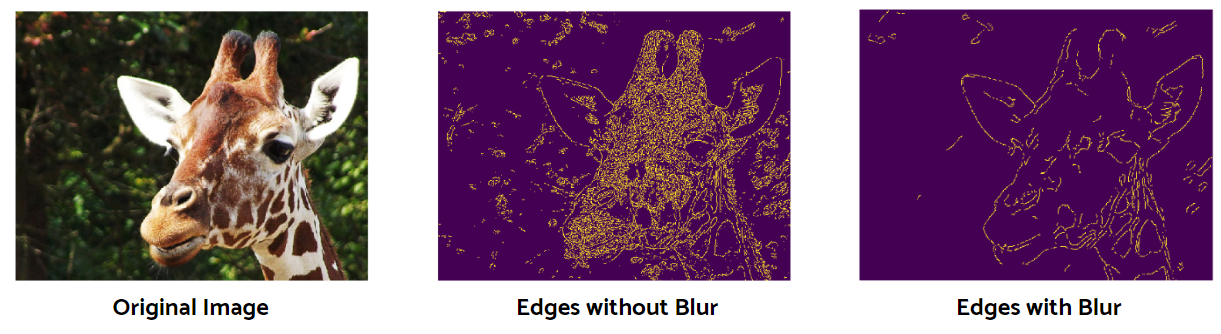

In [1]:
from IPython.display import Image
Image(filename='f.png') 

### Bulanıklaştırma etkilerini elde etmek için kullanılan birkaç teknik var ancak OpenCV'de kullanılan dört ana konu hakkında konuşacağız: Ortalama Bulanıklaştırma, Gauss Bulanıklığı, Median Bulanıklığı ve İkili Filtreleme . Dört tekniğin hepsinde, görüntüye bir filtre (çekirdek) ile evrişimsel işlemler uygulayan ortak bir temel prensip vardır. Uygulama filtrelerinin değerleri, dört bulanıklaştırma yöntemi arasında farklıdır.


### Ortalama bulanıklık , verilen çekirdek alanı altındaki tüm piksel değerlerinin ortalamasını alıyor ve merkezdeki değeri değiştiriyor. Örneğin, 5X5 boyutunda bir çekirdeğimizin olduğunu varsayalım. Toplanan sonucun ortalamasını hesaplıyoruz ve bu sonucu verilen alanın merkezine koyuyoruz.

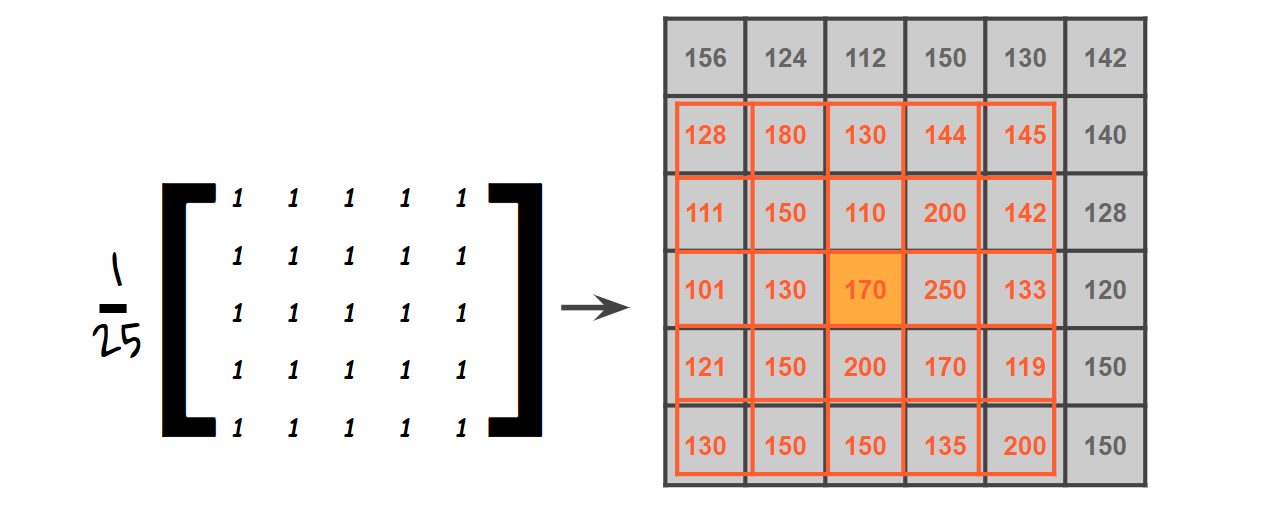

In [2]:
Image(filename='g.png') 

### O zaman çekirdeğin boyutunu arttırırsak etki nasıl olacak? Filtrelerin boyutu büyüdükçe, piksel değerleri daha da normalleşecektir. Bu nedenle görüntünün daha fazla bulanıklaşmasını bekleyebiliriz. Aşağıdaki kod ile sonucu kontrol edelim. (Karşılaştırma için, orijinal görüntüyü sonuca eklemeye devam edeceğim)

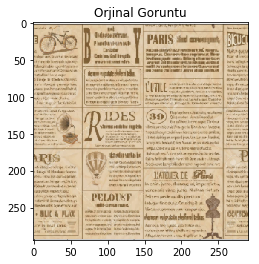

In [14]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# Import the image and convert to RGB 
img = cv2.imread('h.PNG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot the image with different kernel sizes
plt.title('Orjinal Goruntu')
plt.imshow(img)

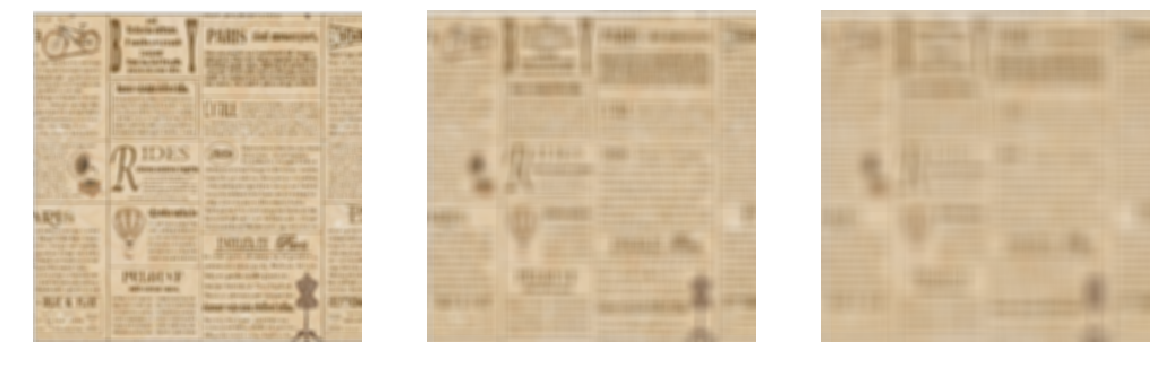

In [15]:
kernels = [5, 11, 17]
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))
for ind, s in enumerate(kernels):
    img_blurred = cv2.blur(img, ksize = (s, s))
    ax = axs[ind]
    ax.imshow(img_blurred)
    ax.axis('off')
plt.show()
##          (5,5) Kernel                             (11,11) Kernel                         (17,17) Kernel

# Gauss ve İkili Filtreleme

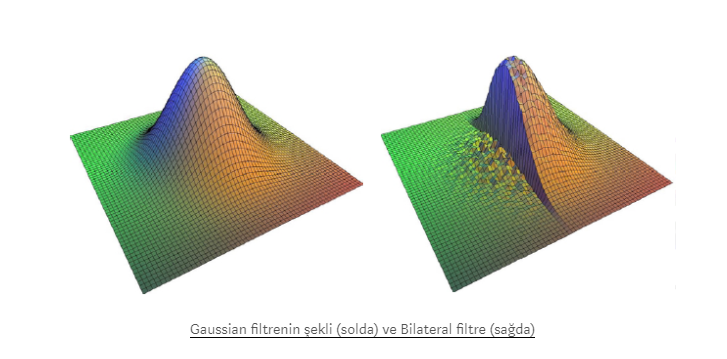

In [8]:
Image(filename='gauss.PNG') 

### Gauss bulanıklığı , değerleri Gauss dağılımına sahip olan çekirdeği kullanmaktan başka bir şey değildir. Değerler bir Gauss işlevi tarafından üretilir, bu nedenle parametresi için bir sigma değeri gerektirir. Yukarıdaki resmi görebildiğiniz gibi, çekirdeğin değerleri merkeze yakınlaşır ve köşeye yakınlaşır. Bu yöntemi beyaz gürültü gibi normal dağılıma sahip seslere uygulamak iyidir .

### İkili Filtreleme , Gauss bulanıklaştırma işleminin gelişmiş bir sürümüdür. Bulanıklaştırma, yalnızca çözünen sesler üretmekle kalmaz, aynı zamanda kenarları düzleştirir. İki taraflı filtre, sesleri giderirken kenarları keskin tutabilir. Gauss dağılımlı değerleri kullanır, ancak hem mesafeyi hem de piksel değeri farklarını hesaba katar. Bu nedenle sigmaSpaceve sigmaColorparametreleri için gerektirir .

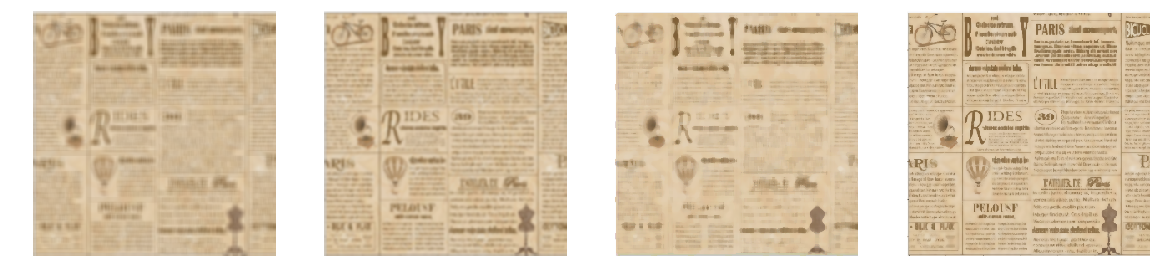

In [17]:
# Blur the image 
img_0 = cv2.blur(img, ksize = (7, 7))
img_1 = cv2.GaussianBlur(img, ksize = (7, 7), sigmaX = 0)   
img_2 = cv2.medianBlur(img, 7)
img_3 = cv2.bilateralFilter(img, 7, sigmaSpace = 75, sigmaColor =75)
# Plot the images
images = [img_0, img_1, img_2, img_3]
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 20))
for ind, p in enumerate(images):
    ax = axs[ind]
    ax.imshow(p)
    ax.axis('off')
plt.show()
##        Blur                        Gaussian Blur                 Median Blur               Biliteral Blur

# THRESHOLDING

### Thresholding, görüntüleri ikili görüntülere dönüştürür. Eşik değeri ve maksimum değerleri ayarlamamız gerekir ve sonra piksel değerlerini buna göre dönüştürürüz. Beş farklı eşik türü vardır: *Binary, the inverse of Binary, Threshold to zero, the inverse of Threshold to Zero ve Threshold truncation.*

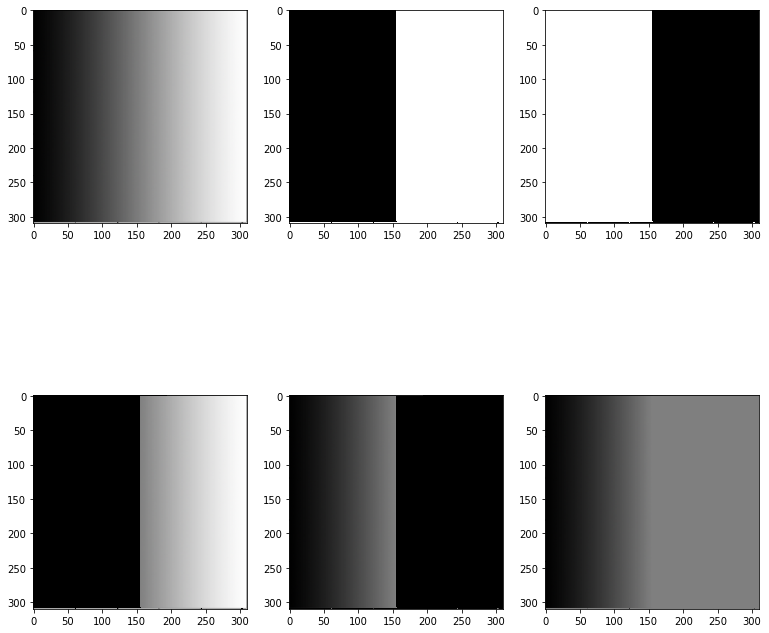

In [10]:
img = cv2.imread('thresh.PNG')
# Thresholding 
_, thresh_0 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, thresh_1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh_2 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, thresh_3 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
_, thresh_4 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
# Plot the images
images = [img, thresh_0, thresh_1, thresh_2, thresh_3, thresh_4]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (13, 13))
for ind, p in enumerate(images):
    ax = axs[ind//3, ind%3]
    ax.imshow(p)
plt.show()

### Ancak, yalnızca bir eşik değer almanın ve bunu görüntünün tüm bölümlerine uygulamanın çok zor olduğunu düşünmüyor musunuz? Farklı alanlarda farklı miktarlarda ışıklandırılmış bir fotoğrafımız varsa? Bu durumda, tüm görüntüye bir değer uygulamak kötü bir seçim olacaktır. Daha iyi bir yaklaşım görüntünün her parçası için farklı eşikler kullanmak olacaktır. Bu soruna hizmet eden Uyarlamalı eşikleme adı verilen başka bir teknik var . Görüntünün komşuluk alanı içindeki eşiği hesaplayarak, değişen aydınlatmalı görüntülerden daha iyi bir sonuç elde edebiliriz.

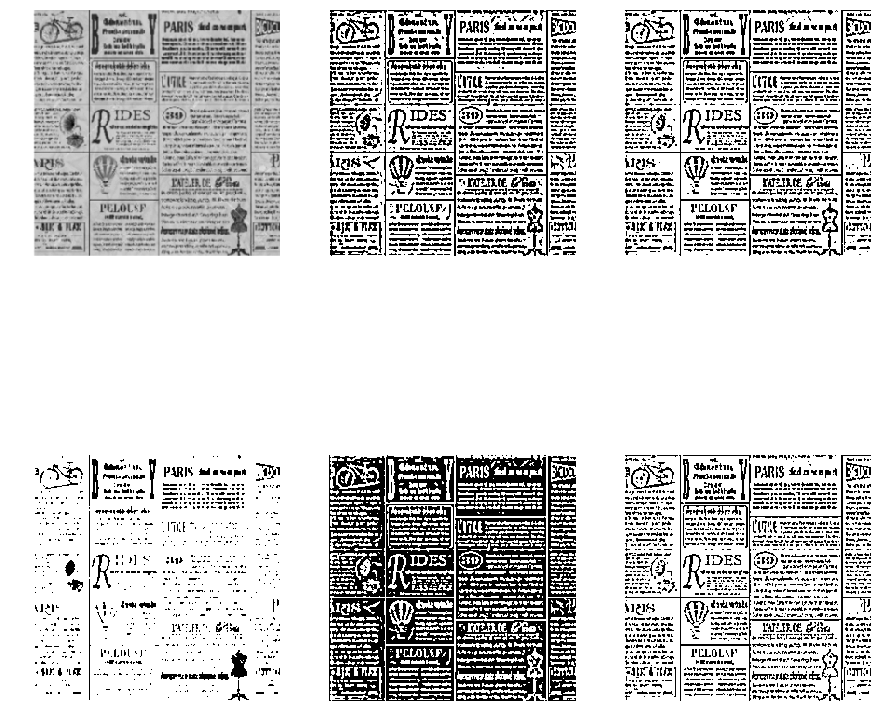

In [21]:
# Convert the image to grayscale
img = cv2.imread('text.PNG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Adaptive Thresholding
_, thresh_binary = cv2.threshold(img, thresh = 127, maxval = 255, type = cv2.THRESH_BINARY)
adap_mean_2 = cv2.adaptiveThreshold(img, 255, 
                                    cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY, 7, 2)
adap_mean_2_inv = cv2.adaptiveThreshold(img, 255, 
                                        cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 7, 2)
adap_mean_8 = cv2.adaptiveThreshold(img, 255, 
                                    cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY, 7, 8)
adap_gaussian_8 = cv2.adaptiveThreshold(img, 255, 
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                    cv2.THRESH_BINARY, 7, 8)
# Plot the images
images = [img, thresh_binary, adap_mean_2, adap_mean_2_inv, 
          adap_mean_8, adap_gaussian_8]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))
for ind, p in enumerate(images):
    ax = axs[ind%2, ind//2]
    ax.imshow(p, cmap = 'gray')
    ax.axis('off')
plt.show()

# Gradient
### Matematikte, gradyan , çok değişkenli bir fonksiyon grafiğinin eğimini geometrik olarak temsil eder. Vektör değerli bir fonksiyon olduğu için bileşenleri olarak bir yön ve büyüklük alır. Burada aynı kavramı görüntülerin piksel değerlerine de getirebiliriz. Görüntü degrade yoğunluğu veya renkli olarak yön değişiklikleri temsil etmektedir ve kenarları bulmak için bu kavramı kullanabilir.

In [24]:
# Apply gradient filtering
sobel_x = cv2.Sobel(img, cv2.CV_64F, dx = 1, dy = 0, ksize = 5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, dx = 0, dy = 1, ksize = 5)
blended = cv2.addWeighted(src1=sobel_x, alpha=0.5, src2=sobel_y,
                          beta=0.5, gamma=0)
laplacian = cv2.Laplacian(img, cv2.CV_64F)

### Sobel operasyonu hem Gauss düzleştirme hem de farklılaştırma kullanmaktadır. Bunu uygular:cv2.Sobel()ve iki farklı yön kullanılabilir: dikey (sobel_x) ve yatay (sobel_y). dx ve dy türevleri gösterir. Zaman dx = 1 , operatör bir filtre yapmak için yatay doğrultuda piksel değerlerinin türevleri hesaplar.

### Biz de iki filtreleri toplayarak her iki yönde de uygulayabiliriz: sobel_x ve sobel_y . Bu fonksiyonla: cv2.addWeighted() , filtrelerin ağırlıklı toplamını hesaplayabiliriz. Yukarıda kod hücresinde görebileceğiniz gibi, iki filtreye aynı miktarda ağırlık verdim.

### Laplacian operasyonu , x ve y'nin ikinci türevlerini kullanır. Matematiksel ifade aşağıda gösterilmiştir.

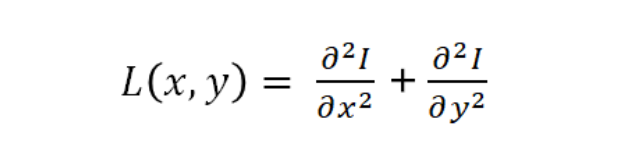

In [25]:
Image(filename='lap.png') 

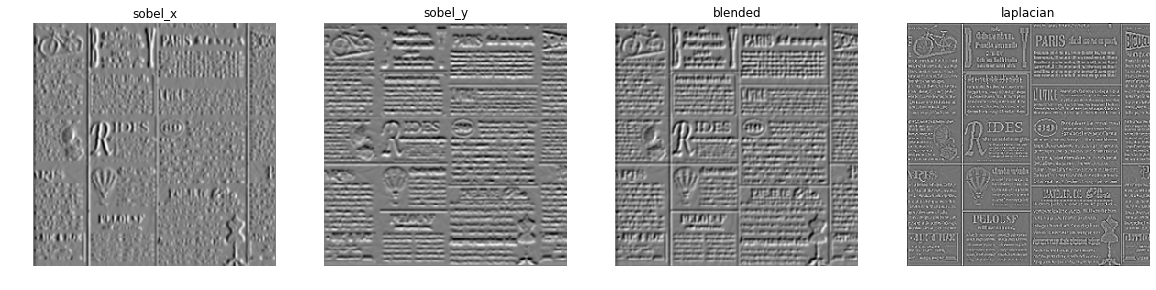

In [30]:
# Plot the images
images = [sobel_x, sobel_y, blended, laplacian]
labels=['sobel_x', 'sobel_y', 'blended', 'laplacian']
plt.figure(figsize = (20, 20))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.title(label=labels[i])
    plt.imshow(images[i], cmap = 'gray')
    plt.axis('off')
plt.show()

### Birinci ve ikinci görüntünün yönlü bir desene sahip olduğu açıktır. İlk görüntü ile kenarları dikey yönde net bir şekilde görebiliyoruz. İkinci görüntü ile yatay kenarları görebiliriz. Hem üçüncü hem de dördüncü görüntülerde, her iki yöndeki kenarlar gösterilmiştir.

# Morfolojik dönüşümler
### Görüntülerin şekillerini, morfolojik dönüşüm olarak adlandırılan filtreleme yoluyla manipüle etmek de mümkündür . Önce erosion ve dilation hakkında konuşalım.

### Erosion , büzülme rakamlarını azaltma tekniğidir ve genellikle gri tonlamalı olarak işlenir. Filtrelerin şekli bir dikdörtgen, bir elips ve bir çapraz şekil olabilir. Bir filtre uygulayarak verilen alanın altındaki herhangi bir 0 değerini kaldırırız.

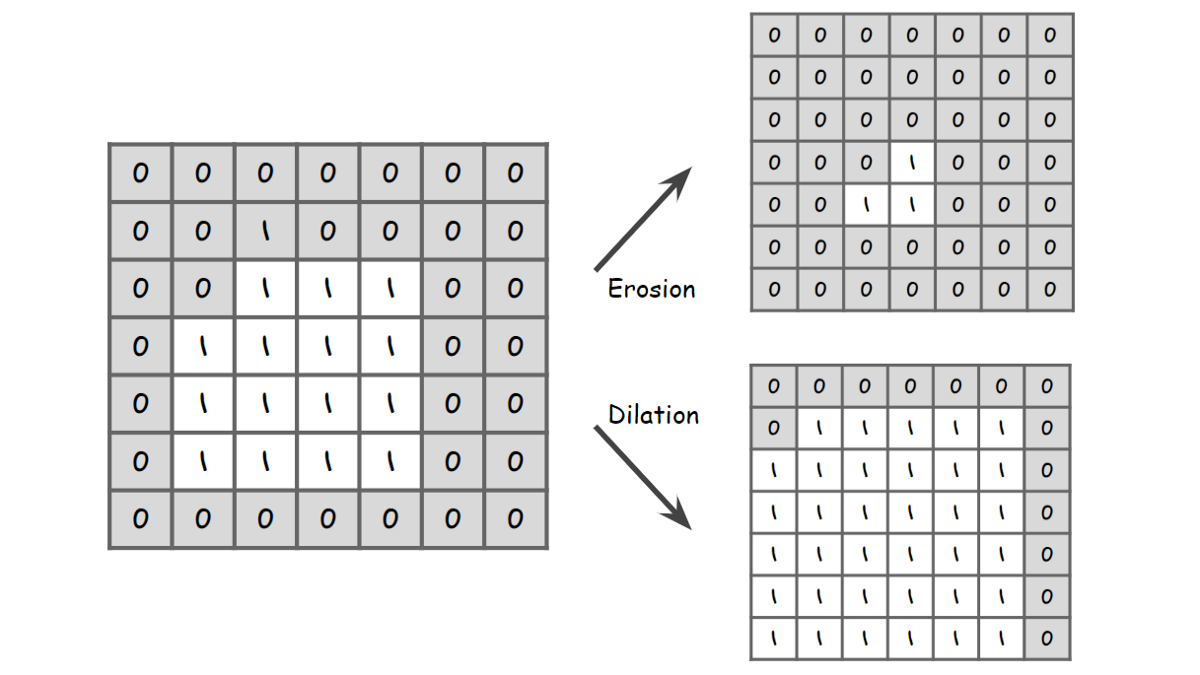

In [31]:
Image(filename='erosion.png') 

### Bunların kodlarda nasıl uygulanabileceğini görelim.

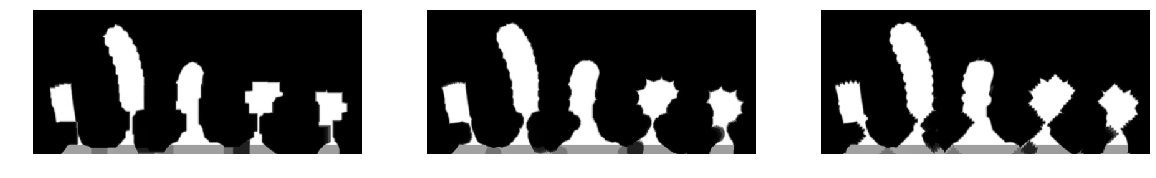

In [33]:
import numpy as np
img = cv2.imread('simpson.PNG')
# Create erosion kernels 
kernel_0 = np.ones((9, 9), np.uint8)
kernel_1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
kernel_2 = cv2.getStructuringElement(cv2.MORPH_CROSS, (9, 9))
kernels = [kernel_0, kernel_1, kernel_2]
# Plot the images
plt.figure(figsize = (20, 20))
for i in range(3):
    img_copy = img.copy()
    img_copy = cv2.erode(img_copy, kernels[i], iterations = 3)
    plt.subplot(1, 3, i+1)
    plt.imshow(img_copy)
    plt.axis('off')
plt.show()

### Dilation erosion tam tersidir. Nesneleri genişletiyor ve operasyon da erozyonun karşıtı olacak. Aşağıdaki kod ile sonucu kontrol edelim.

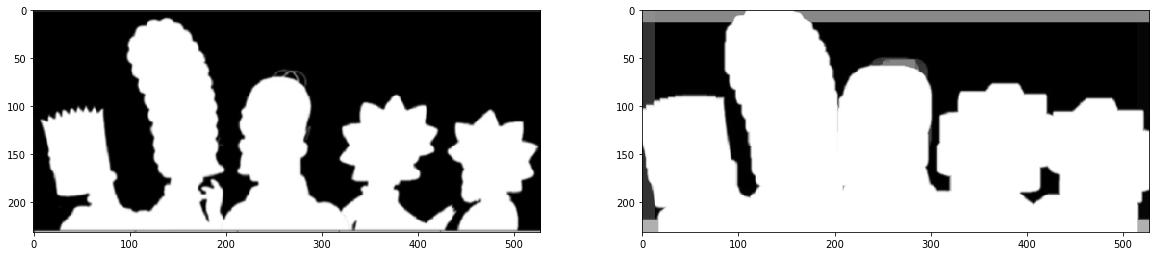

In [34]:
# Apply dilation
kernel = np.ones((9, 9), np.uint8)
img_dilate = cv2.dilate(img, kernel, iterations = 3)
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1); plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2); plt.imshow(img_dilate, cmap="gray")
plt.show()

### ***Opening ve Closing*** işlemi, erosion ve dilation karışık versiyonudur. **Opening** önce erosion yapar, daha sonra erosion sonucu dilation yapılır, ***Closing*** de önce dilatasyon ve erozyon yapılır.

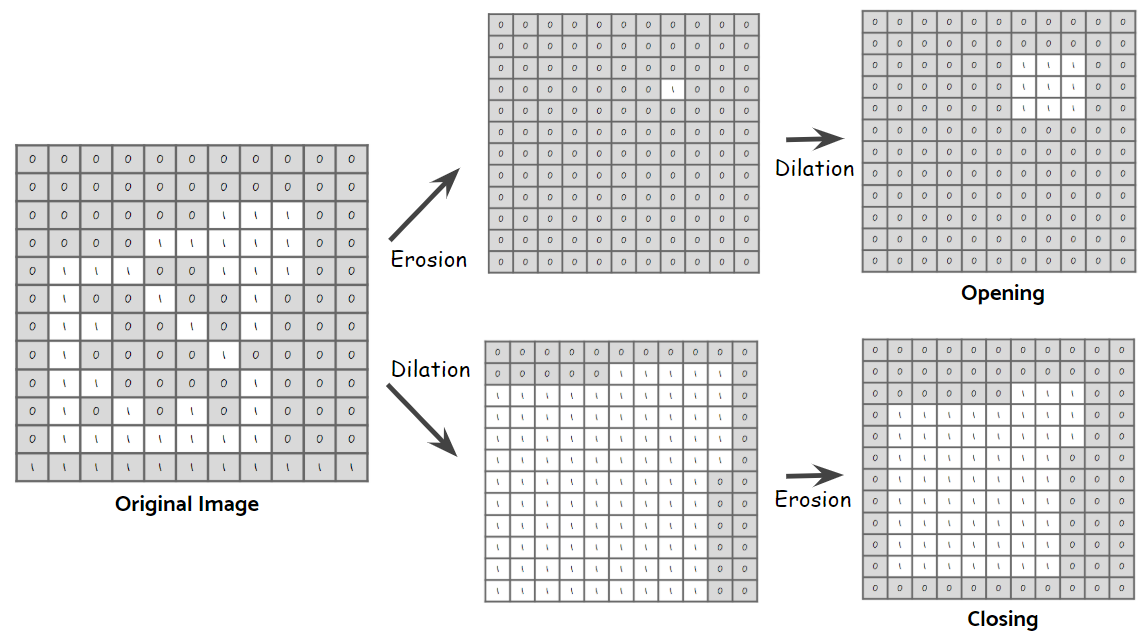

In [35]:
Image(filename='opening.png') 

### Yukarıdaki resmi görebileceğiniz gibi, closing bir şeklin genel çizgisini algılamak için kullanışlıdır ve opening alt kalıpları algılamak için uygundur. Bu operatörleri cv2.morphologyEx() aşağıda gösterilen fonksiyonlarla uygulayabiliriz.

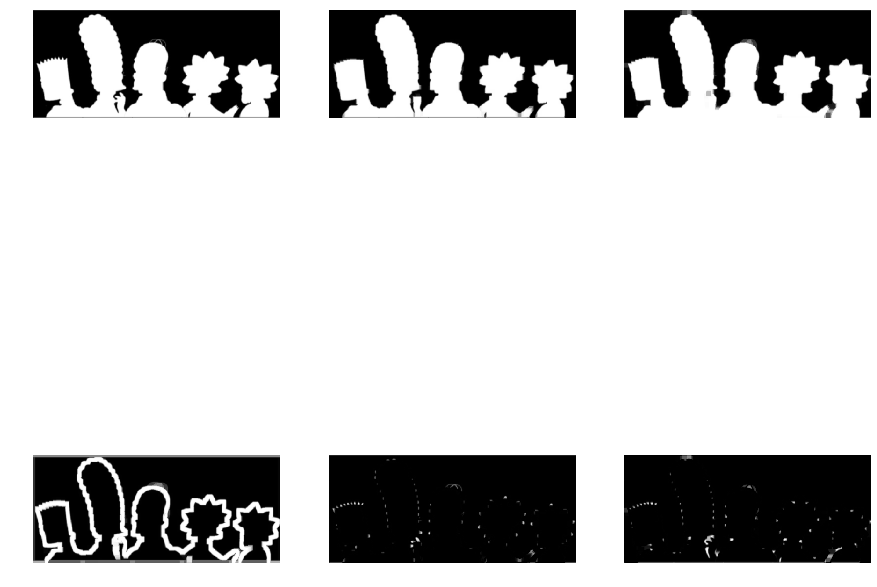

In [41]:
# Apply the operations
kernel = np.ones((9, 9), np.uint8)
img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
img_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
img_grad = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
img_tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
img_blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
# Plot the images
images = [img, img_open, img_close, img_grad, 
          img_tophat, img_blackhat]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))
for ind, p in enumerate(images):
    ax = axs[ind//3, ind%3]
    ax.imshow(p, cmap = 'gray')
    ax.axis('off')
plt.show()

# Faydalı olması dileğiyle